## EDA

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Информация о данных исходного датасета

Датасет **_data.csv** представляет собой информацию по объявлениям об аренде квартир в Москве. Набор данных содержит сведения о типе недвижимости, расположении объекта, его основных характеристиках и условиях аренды.

In [34]:
df = pd.read_csv('_data.csv')
df.head()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


### Сводная информация о наборе данных и типах значений

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID  объявления            23368 non-null  int64  
 2   Количество комнат         22327 non-null  object 
 3   Тип                       23368 non-null  object 
 4   Метро                     22053 non-null  object 
 5   Адрес                     23368 non-null  object 
 6   Площадь, м2               23368 non-null  object 
 7   Дом                       23368 non-null  object 
 8   Парковка                  9951 non-null   object 
 9   Цена                      23368 non-null  object 
 10  Телефоны                  23368 non-null  object 
 11  Описание                  23368 non-null  object 
 12  Ремонт                    20613 non-null  object 
 13  Площадь комнат, м2        14458 non-null  object 
 14  Балкон

# Размер набора данных

In [23]:
print('Количество строк в датасете:', df.shape[0])

Количество строк в датасете: 23368


In [24]:
print('Количество столбцов:', df.shape[1])

Количество столбцов: 25


### Столбцы датасета содержат следующую информацию:

In [25]:
column_names = list(df.columns.values)
print(*column_names, sep='\n ')

Unnamed: 0
 ID  объявления
 Количество комнат
 Тип
 Метро
 Адрес
 Площадь, м2
 Дом
 Парковка
 Цена
 Телефоны
 Описание
 Ремонт
 Площадь комнат, м2
 Балкон
 Окна
 Санузел
 Можно с детьми/животными
 Дополнительно
 Название ЖК
 Серия дома
 Высота потолков, м
 Лифт
 Мусоропровод
 Ссылка на объявление


Набор данных не содержит повторяющихся объявлений, все ID являются уникальными:

In [27]:
df['ID  объявления'].unique().shape[0] == df.shape[0]

True

## Количество пропущенных значений

In [8]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['количество пропущенных значений'])

,количество пропущенных значений
Серия дома,21205
Название ЖК,17520
Парковка,13417
"Высота потолков, м",12162
Мусоропровод,10522
"Площадь комнат, м2",8910
Балкон,7978
Окна,6613
Можно с детьми/животными,6096
Лифт,5500


Принимая во внимание количество пропущенных значений и цели нашего исследования, было решено, что информация в следующих колонках не представляет для нас практического интереса:
- Телефоны
- Описание
- Unnamed: 0
- Серия дома
- Ссылка на объявление
- Название ЖК
- Площадь комнат, м2
- Тип

In [35]:
df_cut = df = df.drop(columns=['Тип', 'Телефоны', 'Описание', 'Unnamed: 0', 'Серия дома', 'Ссылка на объявление', 'Название ЖК', 'Площадь комнат, м2'])
df_cut.head()

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Лифт,Мусоропровод
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)",Да
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)",Нет
2,271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),NaN
3,272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),NaN
4,273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Евроремонт,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,"Пасс (1), Груз (1)",Да


## Колонки которые можем перевести в числовые значения"

Колонка 'цена': оставляем только цену за месяц; коммунальные услуги вынесем в отдельную колонку (True, False); срок аренды, также в отельную колонку

Гистограмма: валюта

Колонка 'Площадь': пример, оставляем общую площадь

Количество комнат: оставим только количество, заполним NaN

Гистограмма по количеству комнат

## Категориальные метки

Перечислить колонки, графики зависимости цены от каждой категории, количество значений каждой категории

## Колонка "Парковка"

In [19]:
df_cut['Парковка'].value_counts(dropna=False)

NaN               13417
наземная           6043
подземная          2772
открытая           1017
многоуровневая      118
на крыше              1
Name: Парковка, dtype: int64

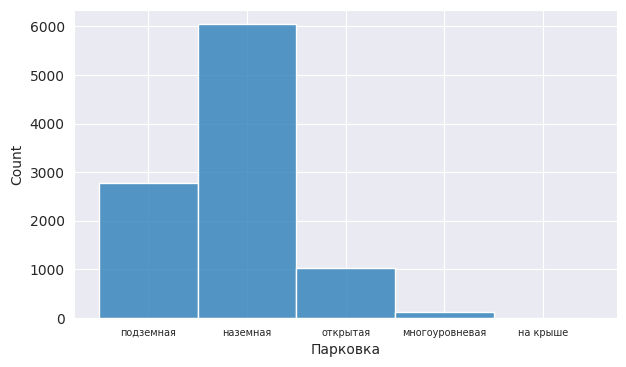

In [20]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df_cut, x='Парковка')
plt.xticks(fontsize=7)
plt.show()

#### Поменяем NaN

## Колонка "Балкон"

In [29]:
df_cut['Балкон'].value_counts(dropna=False)

NaN                       7978
Балкон (1)                7428
Лоджия (1)                6007
Балкон (1), Лоджия (1)     716
Лоджия (2)                 568
Балкон (2)                 474
Балкон (3)                  55
Лоджия (3)                  45
Балкон (2), Лоджия (2)      25
Балкон (1), Лоджия (2)      24
Балкон (2), Лоджия (1)      20
Балкон (4)                   6
Балкон (1), Лоджия (3)       5
Лоджия (4)                   5
Балкон (3), Лоджия (1)       5
Балкон (2), Лоджия (3)       3
Балкон (1), Лоджия (4)       2
Балкон (3), Лоджия (3)       1
Балкон (4), Лоджия (4)       1
Name: Балкон, dtype: int64

#### Делим на две колонки "Балкон" и "Лоджия", NaN заполняем 0

## Колонка "Ремонт"

In [22]:
df_cut['Ремонт'].value_counts(dropna=False)

Косметический    8499
Евроремонт       8470
Дизайнерский     3474
NaN              2755
Без ремонта       170
Name: Ремонт, dtype: int64

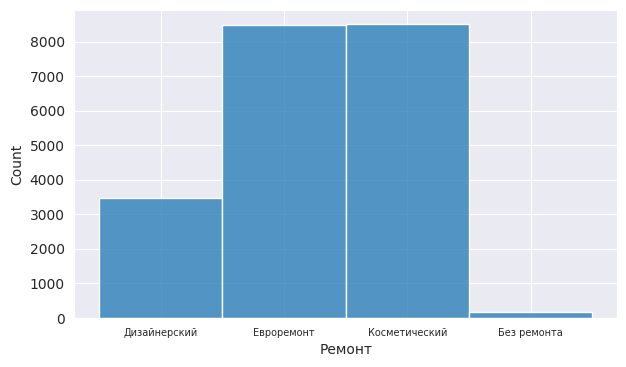

In [23]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df_cut, x='Ремонт')
plt.xticks(fontsize=7)
plt.show()

#### Заменим NaN

## Колонка "Адрес"

#### Поскольку для пилотного проекта выбрана Москва, то необходимо будет отфильтровать значения только для этого города.

In [30]:
df['Адрес'].apply(lambda x: x.split(', ')[0] if type(x) != float else x).value_counts()

Москва                19737
Санкт-Петербург        3028
Краснодарский край      603
Name: Адрес, dtype: int64

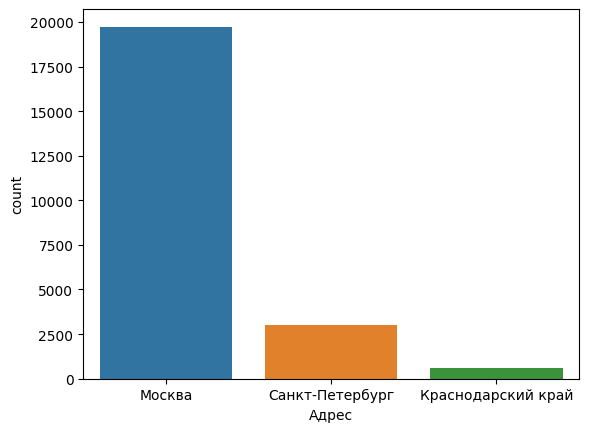

In [31]:
sns.countplot(x=df['Адрес'].apply(lambda x: x.split(', ')[0] if type(x) != float else x));

## Колонка "Количество комнат"

In [36]:
df['Количество комнат'].value_counts()

1                   7917
2, Изолированная    4623
2                   2591
3                   1717
3, Изолированная    1583
3, Оба варианта      875
4                    674
2, Смежная           637
2, Оба варианта      615
4, Оба варианта      253
5                    235
4, Изолированная     223
6                     87
3, Смежная            87
5, Оба варианта       81
5, Изолированная      47
6, Оба варианта       31
6, Изолированная      17
4, Смежная            13
1, Изолированная       8
1, Оба варианта        4
5, Смежная             4
6, Смежная             3
1, Смежная             2
Name: Количество комнат, dtype: int64

#### Данная колонка содержить в себе большое количество значений, которые можно поделить на две колонки с количеством комнат и вариантом размещения. Колонку с количеством комнат, заполнить пропущенные значения и перевести в тип int.¶

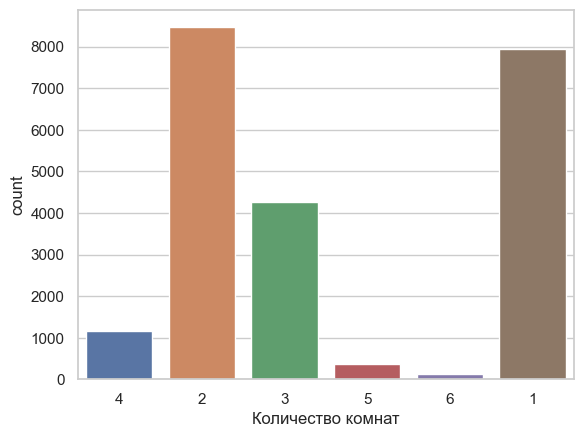

In [37]:
df['Количество комнат'] = df['Количество комнат'].apply(lambda x: x.split(', ')[0] if type(x) != float else x)

sns.set_theme(style="whitegrid")
sns.countplot(x=df['Количество комнат']);

## Колонка "Окна"

In [39]:
df['Окна'].value_counts(dropna=False)

Во двор            10870
NaN                 6613
На улицу и двор     3295
На улицу            2590
Name: Окна, dtype: int64

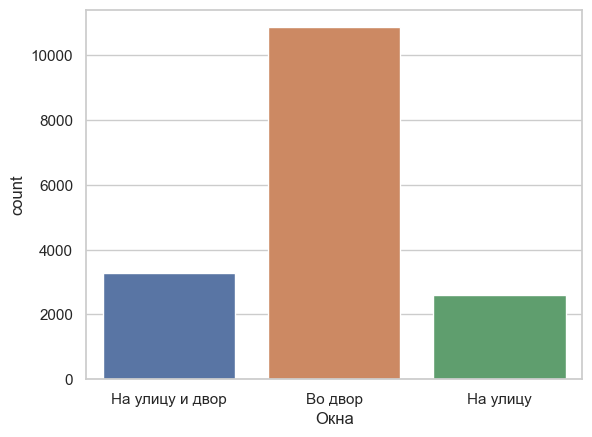

In [38]:
sns.countplot(x=df['Окна']);

#### Заменим NaN

## Колонка "Можно с детьми/с животными"

In [40]:
df['Можно с детьми/животными'].value_counts(dropna=False)

Можно с детьми                       10134
Можно с детьми, Можно с животными     6899
NaN                                   6096
Можно с животными                      239
Name: Можно с детьми/животными, dtype: int64

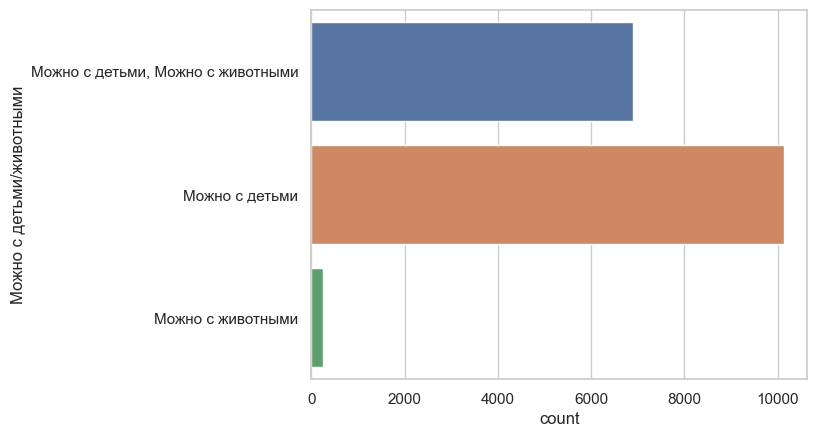

In [41]:
sns.countplot(y=df['Можно с детьми/животными']);

#### Заменим NaN

## Колонка "Лифт"

In [42]:
df['Лифт'].value_counts(dropna=False)

Пасс (1)               5911
NaN                    5500
Пасс (2)               4326
Пасс (1), Груз (1)     3962
Пасс (2), Груз (1)     1224
Пасс (2), Груз (2)      654
Пасс (3)                636
Пасс (4)                346
Пасс (3), Груз (1)      187
Пасс (1), Груз (2)      185
Груз (1)                 95
Пасс (4), Груз (2)       65
Пасс (4), Груз (1)       64
Пасс (3), Груз (3)       45
Пасс (3), Груз (2)       44
Пасс (4), Груз (4)       28
Груз (4)                 25
Груз (2)                 20
Груз (3)                 15
Пасс (4), Груз (3)        7
Пасс (6)                  6
Пасс (1), Груз (3)        6
Пасс (2), Груз (3)        3
Пасс (60)                 2
Пасс (50)                 2
Пасс (1), Груз (12)       1
Пасс (5), Груз (1)        1
Пасс (8), Груз (8)        1
Пасс (7)                  1
Пасс (1), Груз (4)        1
Пасс (5), Груз (3)        1
Пасс (2), Груз (4)        1
Груз (6)                  1
Груз (8)                  1
Пасс (5)                  1
Name: Лифт, dtype: i

#### Нужно заменить NaN, также поделить на тип лифта, а также посчитать общее количество лифтов

## Колонка "Мусоропровод"

In [43]:
df['Мусоропровод'].value_counts(dropna=False)

Да     10897
NaN    10522
Нет     1949
Name: Мусоропровод, dtype: int64

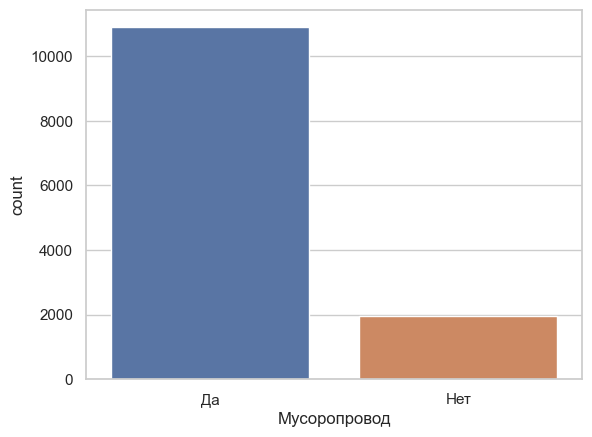

In [44]:
sns.countplot(x=df['Мусоропровод']);

#### Колонка имеет два значения (не включая NaN), которые нужно заменить на 0 или 1¶